# Univariante Linear Regression

Importing necessary utility libraries such as `pandas` for data importation and cleaning, `numpy` for numerical operations, and `matplotlib` for data visualization.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Importing data from cvs file offered

In [2]:
data = pd.read_csv('../data_for_lr.csv')
xvec = data.x
yvec = data.y

##### other data for testing

# xvec = np.array([230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8])
# yvec = np.array([22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6])


# xvec = np.array([1, 2, 3, 4])
# yvec = np.array([1.15, 1.8, 2.45, 3.1])

# xvec = np.array([98, 122, 120, 135, 150])
# yvec = np.array([78, 120, 140, 165, 180])

# xvec = np.array([45, 59, 60, 74, 40, 63, 66, 63, 53, 49, 40, 54, 53, 59, 50, 35, 69,53, 39, 72, 56, 66, 45, 60, 41, 74, 33, 56, 78, 37, 59, 63, 54, 47,64, 39, 51, 81, 79, 52, 58, 72, 94, 71, 62, 63, 95, 84, 40, 79, 81,85, 88, 54, 67, 72, 47, 67, 81, 65, 59, 53, 76, 52, 42, 83, 62, 67,45, 67, 72, 61, 78, 65, 50, 62, 45, 67, 61, 53, 85, 40, 53, 56, 81, 61, 27, 33, 73, 52, 63, 61, 65, 83, 59, 31, 67, 64, 50, 89])

# yvec = np.array([699, 808, 778, 888, 640, 764, 863, 818, 643, 790, 479, 844, 733, 907, 766, 690, 908, 750, 677, 1014, 771, 791, 663, 812, 709, 1091, 625, 807, 998, 764, 712, 808, 757, 638, 825, 783, 568, 1016, 990, 733, 915, 919, 1047, 931, 809, 948, 1131, 945, 605, 883, 1086, 938, 973, 763, 775, 932, 730, 887, 990, 754, 824, 699, 953, 775, 786, 1039,729, 944, 786, 829, 919, 832, 916, 893, 846, 863, 750, 808, 739, 796, 871, 668, 665, 695, 1011, 863, 621, 622, 828, 757, 840, 800, 805, 1007, 883, 598, 834, 881, 792, 979])


Visualise the data

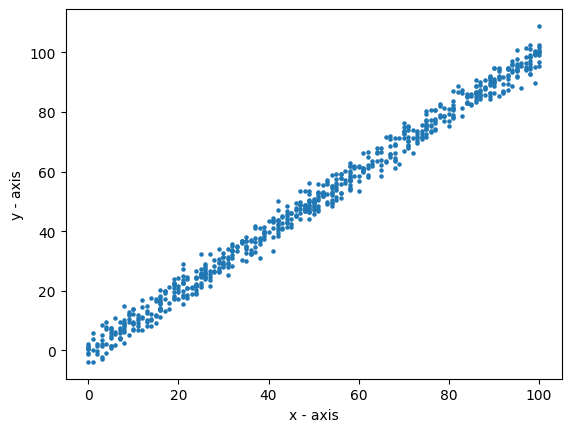

In [3]:
plt.scatter(xvec, yvec, marker='o', s=5)
plt.xlabel("x - axis")
plt.ylabel("y - axis")
plt.show()

Now we will devine the linear function

In [4]:
def f(x, w, b):
    return w * x + b

Our mession now to find the most optimal a and b for now we will take an arbitrary numbers to visualise the linear funciton

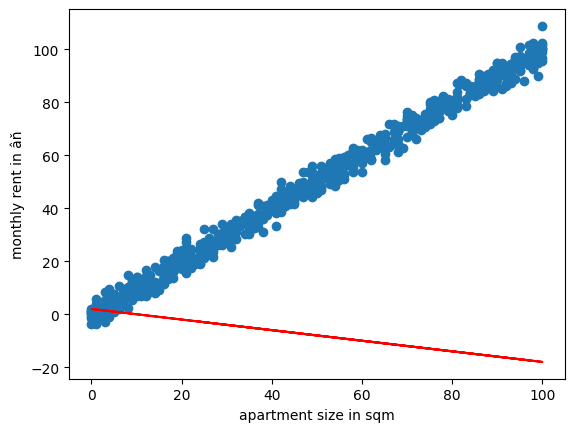

In [5]:
a ,b = -.2, 2
plt.scatter(xvec, yvec)
plt.plot(xvec, f(xvec, a, b), color='red')
plt.xlabel("apartment size in sqm")
plt.ylabel("monthly rent in âň")
plt.show()


It is clearly that it is not the best line for the data
We will use the partial derivative to get the best a, b for more informations click [here](./explaination.ipynb)

first we have to implement the cost function along with the derivative functions of f(w,b)
for more infromation go to [explanation file](./explaination.ipynb)

In [6]:
def compute_cost(x, y, w, b):
    return 1 / (2 * len(x)) * np.sum((f(x, w, b) - y) ** 2)


def dCda(x, y, a, b):
    """
    Calculate the partial derivative of the loss function C with respect to parameter 'a'.

    Args:
    x : array-like, shape (n_samples,)
        The input features.
    y : array-like, shape (n_samples,)
        The target values.
    a : float
        The parameter 'a' of the linear regression model.
    b : float
        The parameter 'b' of the linear regression model.

    Returns:
    dC_da : float
        The partial derivative of the loss function C with respect to parameter 'a'.
    """
    N = len(x)
    return (1 / N) * sum((a * x[i] + b - y[i]) * x[i] for i in range(N))


def dCdb(x, y, a, b):
    """
    Calculate the partial derivative of the loss function C with respect to parameter 'b'.

    Args:
    x : array-like, shape (n_samples,)
        The input features.
    y : array-like, shape (n_samples,)
        The target values.
    a : float
        The parameter 'a' of the linear regression model.
    b : float
        The parameter 'b' of the linear regression model.

    Returns:
    dC_db : float
        The partial derivative of the loss function C with respect to parameter 'b'.
    """
    N = len(x)
    return (1 / N) * sum(a * x[i] + b - y[i] for i in range(N))


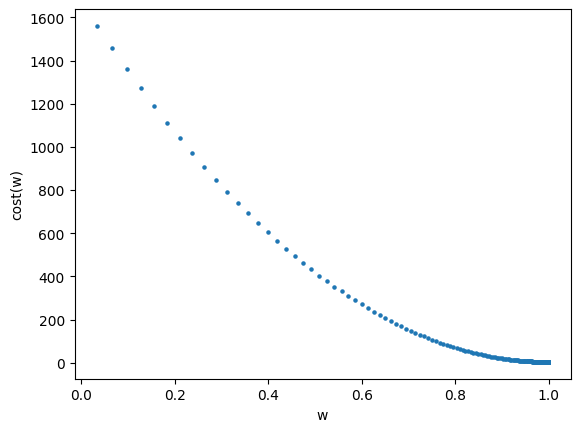

In [7]:
def get_optimal_w_b(xvec, yvec, learning_rate=0.00001, epochs=500):
    # Initialize parameters
    w = 0
    b = 0
    n = len(xvec)
    cost_history = []
    w_history = []
    # Perform gradient descent
    for _ in range(epochs):
        # Compute predictions
        y_pred = f(xvec, w, b)

        # Compute gradients
        grad_w = (-1/n) * np.sum(xvec * (yvec - y_pred))
        grad_b = (-1/n) * np.sum(yvec - y_pred)
        # Update parameters
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

        cost_history.append(compute_cost(xvec, yvec, w, b))
        w_history.append(w)

    plt.scatter(w_history, cost_history, s=5)
    plt.xlabel('w')
    plt.ylabel('cost(w)')
    plt.show()
    return w, b

w,b = get_optimal_w_b(xvec, yvec,) # to adapt to other datasets change learning_rate

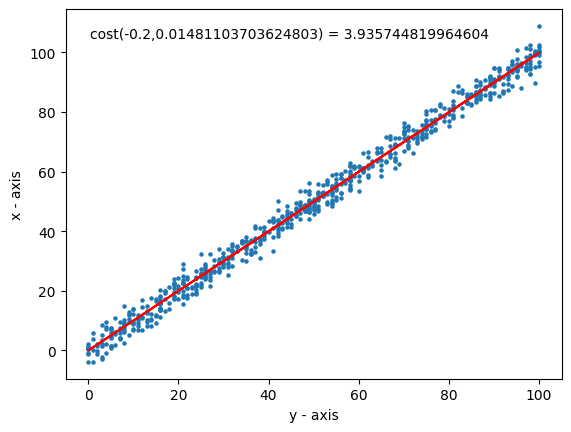

In [8]:
plt.scatter(xvec, yvec, s=5)
plt.plot(xvec, f(xvec, w, b), color='red')
plt.xlabel("y - axis")
plt.ylabel("x - axis")
plt.text(0.05, 0.95, f"cost({a},{b}) = {compute_cost(xvec, yvec, w, b)}",
 transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.show()
